In [51]:
%cd /Users/JW/breast-cancer-project

/Users/JW/breast-cancer-project


In [26]:
import pandas as pd

df = pd.read_csv("/Users/JW/breast-cancer.csv") 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [28]:
## 1. Data preparation and cleaning

In [29]:
# Check missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [30]:
# Check duplicated rows
df.duplicated().sum()

np.int64(0)

In [31]:
# Standardize column names: lower case and snake_case
df.columns = (
    df.columns
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
)

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [32]:
# Encode target variable: M = 1 (malignant), B = 0 (benign)
df["target"] = df["diagnosis"].map({"M": 1, "B": 0})

df[["diagnosis", "target"]].head()

,diagnosis,target
0,M,1
1,M,1
2,M,1
3,M,1
4,M,1


In [33]:
# Remove irrelevant columns
df = df.drop(columns=["id"], errors="ignore")

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,target
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [34]:
## 2. Exploratory Data Analysis (EDA)

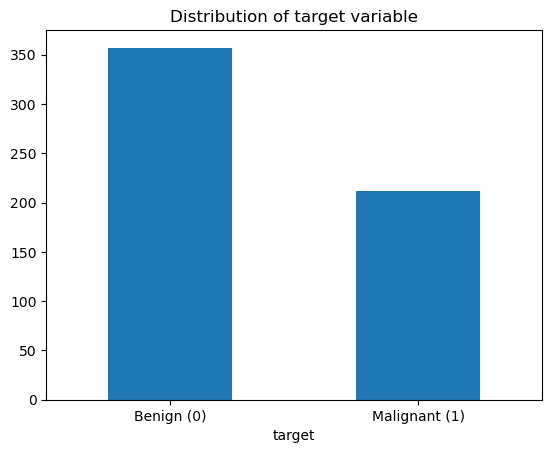

In [35]:
df["target"].value_counts()
df["target"].value_counts(normalize=True)
import matplotlib.pyplot as plt

df["target"].value_counts().plot(kind="bar")
plt.xticks([0, 1], ["Benign (0)", "Malignant (1)"], rotation=0)
plt.title("Distribution of target variable")
plt.show()

In [ ]:
### Target distribution

The dataset contains two classes (benign and malignant).  
The classes are not perfectly balanced，
but the imbalance is moderate and still suitable for standard classification models.

Accuracy can be misleading for imbalanced datasets,  
so we will evaluate models using **ROC AUC**, which is a more reliable metric
for binary classification with unequal class proportions.

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave_points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


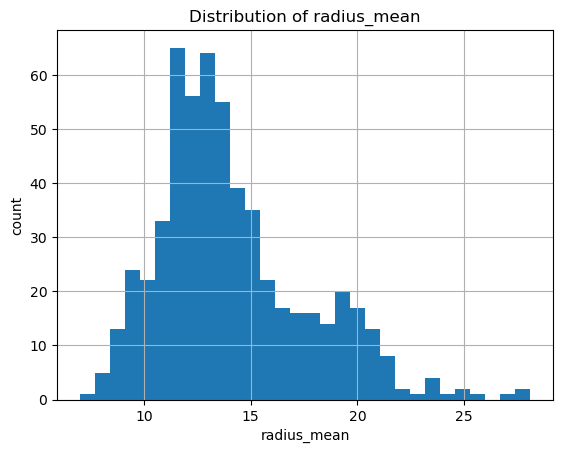

In [45]:
import matplotlib.pyplot as plt

df["radius_mean"].hist(bins=30)
plt.title("Distribution of radius_mean")
plt.xlabel("radius_mean")
plt.ylabel("count")
plt.show()

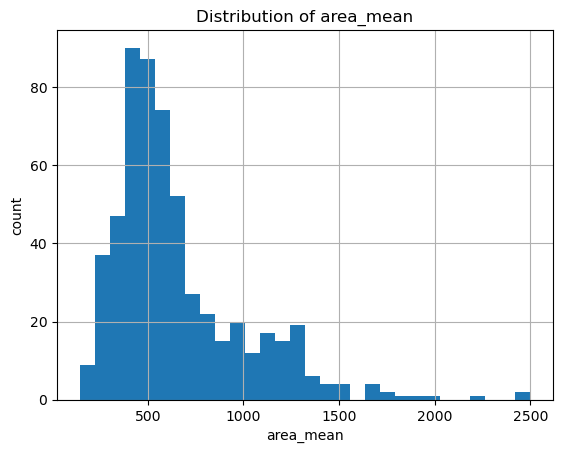

In [44]:
df["area_mean"].hist(bins=30)
plt.title("Distribution of area_mean")
plt.xlabel("area_mean")
plt.ylabel("count")
plt.show()

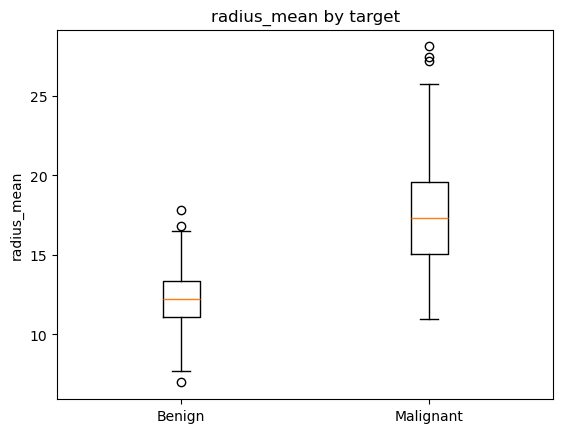

In [47]:
import matplotlib.pyplot as plt

benign_radius = df[df["target"] == 0]["radius_mean"]
malignant_radius = df[df["target"] == 1]["radius_mean"]

plt.boxplot([benign_radius, malignant_radius], tick_labels=["Benign", "Malignant"])
plt.title("radius_mean by target")
plt.ylabel("radius_mean")
plt.show()

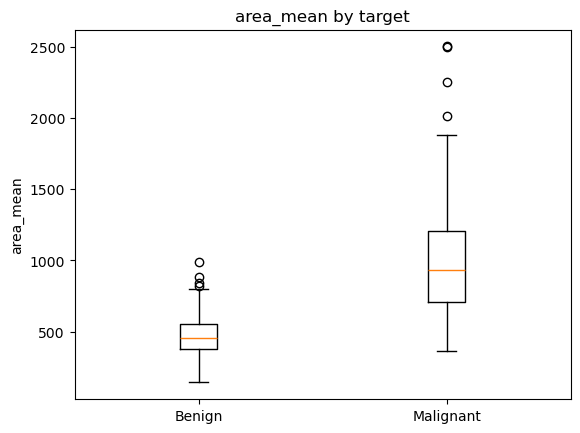

In [46]:
benign_area = df[df["target"] == 0]["area_mean"]
malignant_area = df[df["target"] == 1]["area_mean"]

plt.boxplot([benign_area, malignant_area], tick_labels=["Benign", "Malignant"])
plt.title("area_mean by target")
plt.ylabel("area_mean")
plt.show()

In [ ]:
##Feature distributions
	•	Key continuous features such as radius_mean, area_mean show right-skewed distributions.
	•	Malignant tumors tend to have larger radius and larger area, as seen from the boxplots.


##Differences between classes

Boxplots show clear separation between benign and malignant tumors for many features:
	•	Malignant tumors typically have higher values for radius, perimeter, area, concavity, and compactness.

This indicates that classification should be feasible using supervised learning models.

In [ ]:
correlations = df.corr(numeric_only=True)["target"].sort_values(ascending=False)
correlations

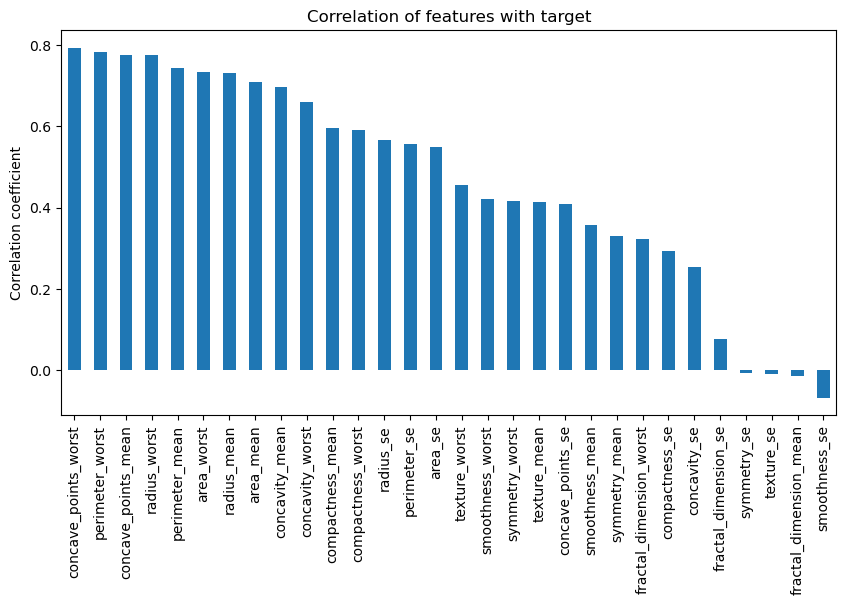

In [48]:
import matplotlib.pyplot as plt

correlations.drop("target").plot(kind="bar", figsize=(10,5))
plt.title("Correlation of features with target")
plt.ylabel("Correlation coefficient")
plt.show()

In [ ]:
##Correlation analysis
Features most strongly correlated with malignancy include:
	•	concave_points_worst, perimeter_worst, concave_points_mean,
	•	radius_worst, area_worst, area_mean

The dataset is clean (no missing values), contains meaningful patterns, and shows strong signal between features and the target.
This suggests that machine learning models—especially linear models and tree-based models—should perform well.

In [50]:
import os
print("Current working directory:", os.getcwd())
print("Files in this folder:", os.listdir())

Current working directory: /Users/JW
Files in this folder: ['Untitled7.ipynb', '.config', 'Music', '.condarc', 'week4.ipynb', '.docker', 'Untitled5.ipynb', 'Untitled1.ipynb', '.DS_Store', 'pipeline_v1.bin', '.CFUserTextEncoding', 'uv.lock', '.xonshrc', 'anaconda_projects', 'Untitled3.ipynb', 'Untitled.ipynb', 'week5.ipynb', 'module2_homework_jw.ipynb', 'breast-cancer-project', '.zshrc', 'Dockerfile', 'Untitled4.ipynb', 'Untitled6.ipynb', 'Pictures', 'Notebook.ipynb', 'pyproject.toml', 'Untitled2.ipynb', '.ipython', 'Desktop', 'Library', '.matplotlib', '__pycache__', 'mlzoomcamp2025_1_jw.ipynb', 'homework6.ipynb', 'README.md', '.cups', '.bash_sessions', 'untitled.txt', 'breast-cancer.csv', 'Public', '.tcshrc', '.venv', '.anaconda', 'Untitled8.ipynb', 'Movies', 'Applications', '.python-version', 'app.py', '.Trash', '.ipynb_checkpoints', '.jupyter', 'Documents', '.vscode', 'main.py', '.bash_profile', 'data', 'Downloads', '.continuum', '.cache', '.gitconfig', '.bash_history', 'car_fuel_eff

In [53]:
with open("model_rf.bin", "rb") as f:
    model = pickle.load(f)

Saved to image/feature_importance.png


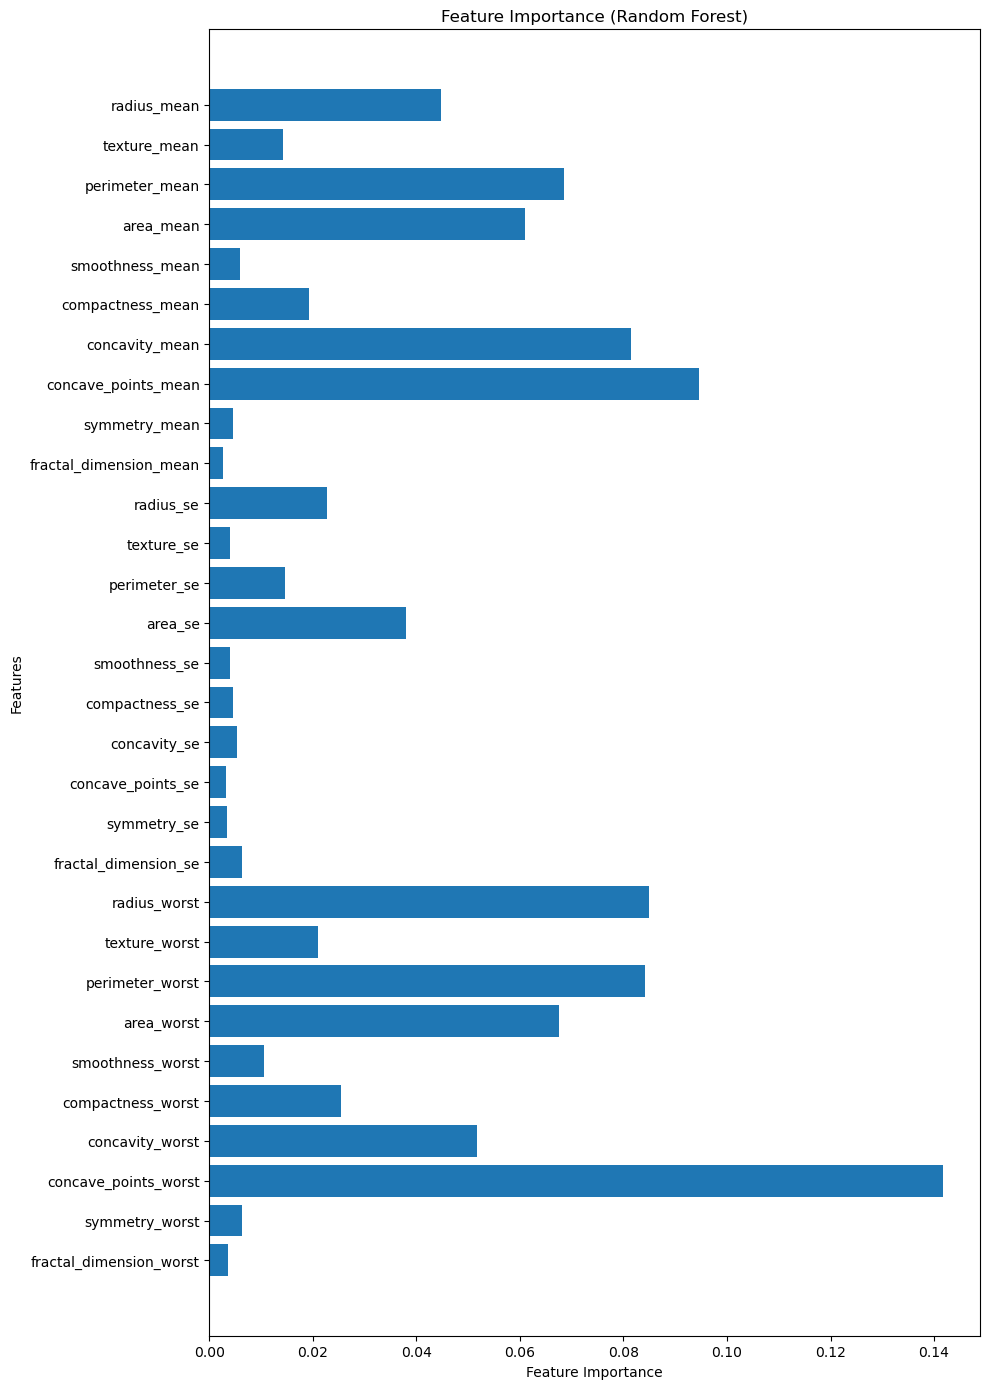

In [54]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load your trained model
with open("model_rf.bin", "rb") as f:
    model = pickle.load(f)

# 2. Load the dataset to get feature names
df = pd.read_csv("breast-cancer.csv")

# same preprocessing as train.py
df.columns = df.columns.str.lower().str.replace(" ", "_").str.replace("-", "_")

df["target"] = df["diagnosis"].map({"M": 1, "B": 0})
df = df.drop(columns=["id", "diagnosis"])

X = df.drop(columns=["target"])

# 3. Get feature importance
importances = model.feature_importances_
feature_names = X.columns

# 4. Plot
plt.figure(figsize=(10, 14))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()  # Largest importance at top
plt.tight_layout()

# 5. Save to file in your image folder
plt.savefig("image/feature_importance.png")
print("Saved to image/feature_importance.png")

In [ ]:
## 3. Model Training and Selection

In [ ]:
from sklearn.model_selection import train_test_split

# Step 1: First split into train+val and test (80% / 20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Split train+val into train and val (75% of 80% = 60%)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

X_train.shape, X_val.shape, X_test.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

C_values = [0.01, 0.1, 1, 10, 100]
scores = []

for C in C_values:
    model = LogisticRegression(C=C, max_iter=5000)
    model.fit(X_train_scaled, y_train)
    
    y_val_pred = model.predict_proba(X_val_scaled)[:, 1]
    auc = roc_auc_score(y_val, y_val_pred)
    scores.append((C, auc))
    print(f"C={C}: AUC={auc:.4f}")

In [ ]:
##Best: C=100

In [38]:
import numpy as np

# Combine train + val
X_full_train = np.vstack([X_train_scaled, X_val_scaled])
y_full_train = np.concatenate([y_train, y_val])

best_C = 100

# Train final model
final_lr = LogisticRegression(C=best_C, max_iter=5000)
final_lr.fit(X_full_train, y_full_train)

# Evaluate on test set
y_test_pred = final_lr.predict_proba(X_test_scaled)[:, 1]
auc_test = roc_auc_score(y_test, y_test_pred)
auc_test

np.float64(0.976521164021164)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Baseline Random Forest model
rf_base = RandomForestClassifier(
    n_estimators=100,   
    max_depth=6,        
    random_state=42,
    n_jobs=-1           
)

rf_base.fit(X_train, y_train)


y_val_pred_rf = rf_base.predict_proba(X_val)[:, 1]

auc_rf_base = roc_auc_score(y_val, y_val_pred_rf)
auc_rf_base

np.float64(0.9914837864395677)

In [ ]:
##Random Forest Hyperparameter Tuning

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

max_depth_values = [3, 5, 7, None]
n_estimators_values = [50, 100, 200]
min_samples_leaf_values = [1, 3, 5]

rf_results = []

for md in max_depth_values:
    for ne in n_estimators_values:
        for msl in min_samples_leaf_values:
            rf = RandomForestClassifier(
                n_estimators=ne,
                max_depth=md,
                min_samples_leaf=msl,
                random_state=42,
                n_jobs=-1
            )
            rf.fit(X_train, y_train)
            y_val_pred = rf.predict_proba(X_val)[:, 1]
            auc = roc_auc_score(y_val, y_val_pred)

            rf_results.append((md, ne, msl, auc))
            print(f"max_depth={md}, n_estimators={ne}, min_samples_leaf={msl} -> AUC={auc:.4f}")

max_depth=3, n_estimators=50, min_samples_leaf=1 -> AUC=0.9862
max_depth=3, n_estimators=50, min_samples_leaf=3 -> AUC=0.9859
max_depth=3, n_estimators=50, min_samples_leaf=5 -> AUC=0.9859
max_depth=3, n_estimators=100, min_samples_leaf=1 -> AUC=0.9879
max_depth=3, n_estimators=100, min_samples_leaf=3 -> AUC=0.9876
max_depth=3, n_estimators=100, min_samples_leaf=5 -> AUC=0.9885
max_depth=3, n_estimators=200, min_samples_leaf=1 -> AUC=0.9876
max_depth=3, n_estimators=200, min_samples_leaf=3 -> AUC=0.9882
max_depth=3, n_estimators=200, min_samples_leaf=5 -> AUC=0.9892
max_depth=5, n_estimators=50, min_samples_leaf=1 -> AUC=0.9944
max_depth=5, n_estimators=50, min_samples_leaf=3 -> AUC=0.9898
max_depth=5, n_estimators=50, min_samples_leaf=5 -> AUC=0.9882
max_depth=5, n_estimators=100, min_samples_leaf=1 -> AUC=0.9918
max_depth=5, n_estimators=100, min_samples_leaf=3 -> AUC=0.9895
max_depth=5, n_estimators=100, min_samples_leaf=5 -> AUC=0.9889
max_depth=5, n_estimators=200, min_samples_lea

In [ ]:
##Final Random Forest model (train + val → test)

In [41]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


X_full_train_rf = np.vstack([X_train, X_val])
y_full_train_rf = np.concatenate([y_train, y_val])


best_max_depth = None
best_n_estimators = 50
best_min_samples_leaf = 1


final_rf = RandomForestClassifier(
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    min_samples_leaf=best_min_samples_leaf,
    random_state=42,
    n_jobs=-1
)


final_rf.fit(X_full_train_rf, y_full_train_rf)

# Evaluate on test set
y_test_pred_rf = final_rf.predict_proba(X_test.to_numpy())[:, 1]
auc_test_rf = roc_auc_score(y_test, y_test_pred_rf)
auc_test_rf

np.float64(0.9943783068783069)

In [42]:
print("Final Model Comparison on Test Set:")
print(f"Logistic Regression Test AUC: {auc_test:.4f}")
print(f"Random Forest Test AUC:      {auc_test_rf:.4f}")

Final Model Comparison on Test Set:
Logistic Regression Test AUC: 0.9765
Random Forest Test AUC:      0.9944
